In [1]:
# effettuare una multi model esnemble: considerazione le simulazioni da 3 diversi modelli e vogliamo stimare il miglior modello, il modello centrale aggregnado i 3, facendone la media dunque.
# considerimao 3 simulazioni con 3 modelli diversi, con temperature superficiali con periodio dal 1850 al 2014. In particolare considerare la temperatura media rispetto all'intero periodo.
# plottare mutli model ensable (media e deviazione standard)
# abbiamo 3 modelli diversi che rappresentano la stessa variabile sullo stesso periodo di tempo  -focalizzarci sulla temperatura media rispetto l'intero periodo di tempo e plottare la multi model ensamble mostrando sia la media che la dev standard. Questo perchè accorpiamo 3 modelli.

# un multi model ensamble che è un insieme di simulazioni effettuate con modelli climatici, lo stesso esperimento effettuato con 3 diversi modelli, 3 differenti realizzazioni di uno stesso processo. Questo dunque è uno strumento che permette di fare un assessment sul grado di incertezza delle simulazioni ecc.

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 3.
# Climate models
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) netCDF file format / raster data
# (2) Visualization
# (3) Re-gridding
# (4) Multi-model ensembles

# We will work with datasets from CMIP6 archive; in the examples I will use the following cases:
#  ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
#  ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
#  ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc
#  ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc

# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1ZEtDFYKhS_CEeYFzoe23vpDCIqR61bm5/view?usp=sharing

In [2]:
# Exercise 3
# Multi-model ensemble

# prendiamo il valore medio rispetto ad un periodo di riferimento rispetto al tempo, in questo caso l'intero periodo della simulazione storica. Costruiamo poi delle mappe che rappresentano la multi model ensable, quindi la media e la dev standard della multi moedl esnbale, quindi considerando un periodo costruire una mappa che misuri quelli che sono i campi di temperatura medi annuali del periodo di riferimento simualti dai 3 modelli e qual è il grado di variabilità

# Now let's consider 3 model simulations of surface temperatures for the historical period 1850-2014, 
#  in particlar the average temperature over the entire period.
#
# Plot the multi-model ensemble average surface temperature map, 
#  and a map showing the standard deviation of the ensemble

# Check these links:
# https://xarray.pydata.org/en/stable/user-guide/interpolation.html
# https://xarray.pydata.org/en/stable/generated/xarray.DataArray.interp.html#xarray.DataArray.interp
# https://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp_like.html

In [3]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
#from cartopy.util import add_cyclic_point

import xarray as xr
import nc_time_axis

import numpy as np

# Lettura 3 modelli netCDF file

In [4]:
#- Open & explore the netCDF file for model 1; extract model name

# prendiamo i 3 diversi modelli, cambia la configurazione della griglia orizzontale per i 3 diversi modelli

# il primo modello ha uan griglia orizzonatale di 143 * 144 ad esempio

modfile1='C:/Users/loren/Desktop/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
#modfile1='./ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'

m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model1=modfile1[len(m_variable):-len(m_case)]

d1 = xr.open_dataset(modfile1)
d1

<xarray.Dataset>
Dimensions:      (lat: 143, lon: 144, time: 1980, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ts           (time, lat, lon) float32 ...
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

In [5]:
#- Open & explore the netCDF file for model 2; extract model name

modfile2='C:/Users/loren/Desktop/ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc'
#modfile2='./ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'

model2=modfile2[len(m_variable):-len(m_case)]

d2 = xr.open_dataset(modfile2)
d2

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T03:52:25Z
    ...                     ...
    variable_id:            ts
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/0b38948e-85f7-4726-8f0b-291088a1cbef
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [6]:
#- Open & explore the netCDF file for model 3; extract model name

modfile3='C:/Users/loren/Desktop/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc'
#modfile3='./ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'

model3=modfile3[len(m_variable):-len(m_case)]

d3 = xr.open_dataset(modfile3)
d3

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2018-11-30T16:15:09Z
    ...                     ...
    variable_id:            ts
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/24645cf7-2812-40bc-a320-cfc906678afe
    NCO:                    netCDF Operators version 4.7.6 (Homepage = http:/...

# Regredding

In [7]:
# utilizziamo la procedura di regredding per portare tutti i 3 modelli sulla stessa griglia (ha senso prendere mondelli a più alta risolzuione e trasporli su modelli a più risoluzione). Abbiamo scelto come target la griglia del modello 1


# Regridding of the entire dataset: bilinear interpolation (model 2)

# NOTE: normally, we should go from higher resolution to lower resolution !

d2i_lin = d2.interp(lat=d1.lat, lon=d1.lon, method='linear')
d2i_lin

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 143, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1850-01-01 1850-02-01 ... 2015-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -89.38 -89.36 ... 89.36 89.38 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 1.562 ... 355.9 356.6 358.4
    ts         (time, lat, lon) float64 243.9 243.9 243.9 ... 246.8 246.8 246.8
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T03:52:25Z
    ...                     ...
    variable_id:            ts
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/0b38948e-85f7-4726-8f0b-291088a1cbef
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [8]:
# Regridding of the entire dataset: bilinear interpolation (model 3)

# NOTE: normally, we should go from higher resolution to lower resolution !

#d3i_lin = d3.interp(lat=d1.lat, lon=d1.lon, method='linear')
d3i_lin = d3.interp_like(d1, method='linear')
d3i_lin

<xarray.Dataset>
Dimensions:   (lat: 143, bnds: 2, lon: 144, time: 1980)
Coordinates:
  * lat       (lat) float64 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time      (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 nan nan -89.76 -88.08 ... 88.08 89.76 nan nan
    lon_bnds  (lon, bnds) float64 -0.7031 0.7031 1.797 ... 355.7 356.8 358.2
    ts        (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2018-11-30T16:15:09Z
    ...                     ...
    variable_id:            ts
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/24645cf7-2812-40bc-a320-cfc906678afe
    NCO:                    netCDF Operators version 4.7.6 (Homepage = http:/...

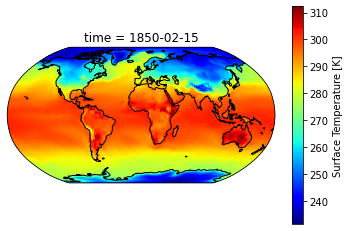

In [9]:
# Plot to check

# alcuni plot per verificare, considero il dataset 3 interpolato

p0 = d3i_lin.ts.isel(time=1).plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()

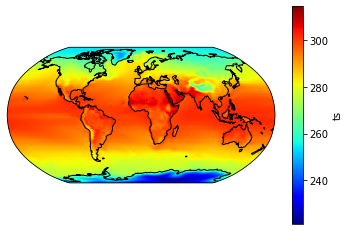

In [10]:
# Plot to check

# prendo la versione originale per fare dei check

p0 = d3.ts.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()

# Calcolo media e deviazione standard

In [11]:
# appurato che abbiamo ora i 3 modelli sisteamti, dobbiamo calcolare la media. Dobbiamo prima comprimere la dimensione tempo in ciascund ataset e poi fare la medai delle tre mappe

# Calculate the average of the 3 models
# We will compress the time dimension in each dataset, the we will make the average of the 3 maps

# First, we create a new xarray.Dataset with the time dimension averagred from d1, 
#   then add the same from the interpolated d2 and d3 (using "merge")

ens0 = d1.mean('time',keep_attrs=True)  # media rispetto il tempo di tutto l'intero dataset di 1, mantengo gli attributi, un una cella avrà il valore medio che essa assume (quella lat e long) nel corso degli anni che ho a disposizione
ens0

<xarray.Dataset>
Dimensions:  (lat: 143, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    ts       (lat, lon) float32 220.3 220.3 220.3 220.3 ... 255.6 255.6 255.6
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

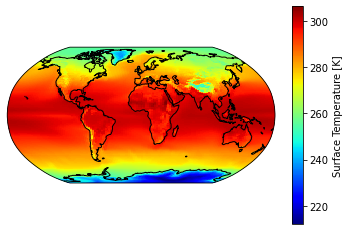

In [12]:
# Plot

p0 = ens0.ts.plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()

In [13]:
ens1 = ens0.merge(d2i_lin.ts.rename('ts2').mean('time'))  # attacco il dataset 2 rigrigliato mediato rispetto al tempo, rename per non sovrascrivere ts
ens1

<xarray.Dataset>
Dimensions:  (lat: 143, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    ts       (lat, lon) float32 220.3 220.3 220.3 220.3 ... 255.6 255.6 255.6
    ts2      (lat, lon) float64 222.6 222.6 222.6 222.6 ... 253.8 253.8 253.8
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

In [14]:
ens = ens1.merge(d3i_lin.ts.rename('ts3').mean('time'))
ens

# ho unito i 3 modelli infatti vedo ho ts, ts2, ts3

<xarray.Dataset>
Dimensions:  (lat: 143, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    ts       (lat, lon) float32 220.3 220.3 220.3 220.3 ... 255.6 255.6 255.6
    ts2      (lat, lon) float64 222.6 222.6 222.6 222.6 ... 253.8 253.8 253.8
    ts3      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

In [15]:
# Calculate the mean and standard deviation of the 3 models

# calcolo ora media e deviazione standard
ens_mean = ens.to_array(dim='new').mean('new')  # è un trucchetto per calolcare la media delle 3 colonne, ts, ts2 e ts3. Passaggio un po meccanico
ens_stdev = ens.to_array(dim='new2').std('new2')

ens['ens_mean'] = ens_mean - 273.15 # convert to Celsius
ens['ens_stdev'] = ens_stdev  # non serve perchè c'è una corrisponedneza uno a uno per la devianzio standrd per gradi e kelvin

ens

<xarray.Dataset>
Dimensions:    (lat: 143, lon: 144)
Coordinates:
  * lat        (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    ts         (lat, lon) float32 220.3 220.3 220.3 220.3 ... 255.6 255.6 255.6
    ts2        (lat, lon) float64 222.6 222.6 222.6 222.6 ... 253.8 253.8 253.8
    ts3        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ens_mean   (lat, lon) float64 -51.7 -51.7 -51.7 ... -18.45 -18.45 -18.45
    ens_stdev  (lat, lon) float64 1.177 1.177 1.177 ... 0.8772 0.8772 0.8772
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

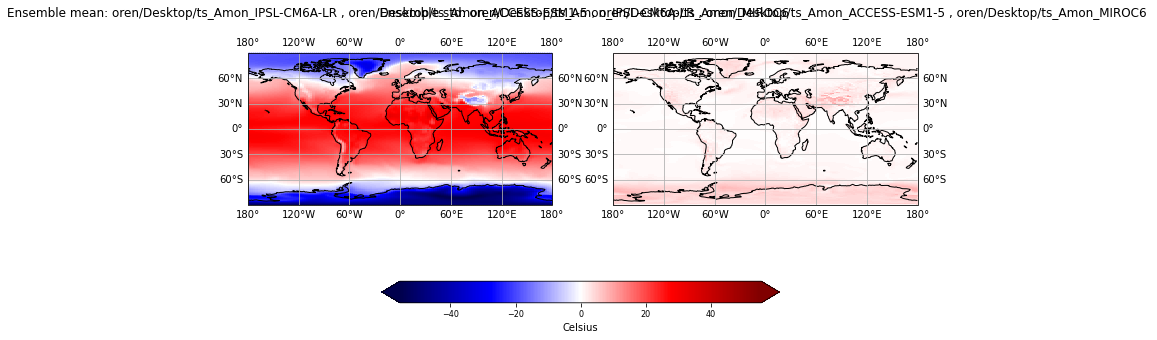

In [16]:
# plot

# Set plot

fig = plt.figure(figsize=(12,6))  # x,y(inches)

subplots = (1,2)
n_panels = subplots[0] * subplots[1]

# I will use the same colormap and scale for all plots, to facilitate comparison.
# Because we will also show the difference, we want this scale to be symmetric about zero
# color map uguale

tmax = np.abs(ens.ens_mean).max()
norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax) 
cmap = mpl.cm.seismic

# Mean

ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
ax.set_title(' '.join(['Ensemble mean:',model1,',',model2,',',model3,'\n']))
ax.set_global()
mm = ax.pcolormesh(ens.lon, ens.lat, ens.ens_mean,
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)

# Std

ax = fig.add_subplot(subplots[0], subplots[1], 2, projection=ccrs.PlateCarree())
ax.set_title(' '.join(['Ensemble std:',model1,',',model2,',',model3,'\n']))
ax.set_global()
mm = ax.pcolormesh(ens.lon, ens.lat, ens.ens_stdev,
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

# a sinistra ensable mean e destra ensable deviazione standard.
# Possiamo vedere le aree in cui c'è maggiore concordanza nei valori assoluti di tempertura dei 3 modelli e le zone in cui c'è una maggiore divergenza nei valori simultati: ad esempio himalaya, antartide ecc.